In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('Family1.csv')
data.head()

,Unnamed: 0,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Threat_Binary,Threat
0,0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0
1,1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,...,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,0,0
2,2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,...,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,0,0
3,3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,...,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,0,0
4,4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,0,0


In [ ]:
# Separate majority and minority classes
majority_class = data[data['Threat_Binary'] == 1]
minority_class = data[data['Threat_Binary'] == 0]

# Determine the number of samples to keep from the majority class
undersample_size = len(minority_class)

# Randomly select samples from the majority class
undersampled_majority = majority_class.sample(n=undersample_size, random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset to mix up the samples
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
y = undersampled_data['Threat_Binary']
#y = y.apply(lambda x: 1 if x ==0 else 0)
x = undersampled_data.copy(deep = True).drop(['Threat','Threat_Binary'],axis = 1)
scaler = StandardScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(x)

#Logistic Regression - 100 Epochs

620/620 [==============================] - 1s 1ms/step
Accuracy: 0.9996972754793139
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9870
           1       1.00      1.00      1.00      9950

    accuracy                           1.00     19820
   macro avg       1.00      1.00      1.00     19820
weighted avg       1.00      1.00      1.00     19820



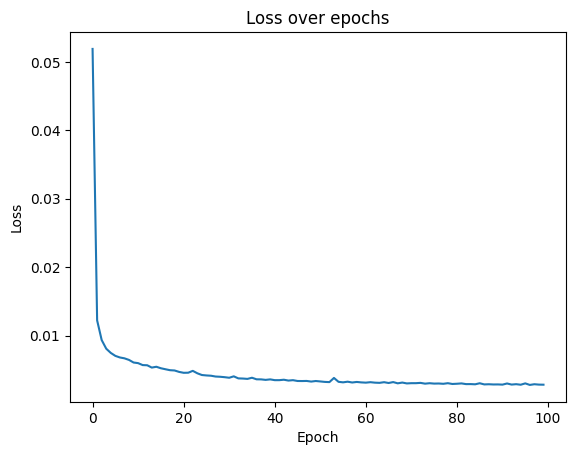

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the logistic regression model
logistic_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Compile the model
logistic_model.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

# Initialize lists to store loss history
loss_history = []

# Define a custom callback to track loss history
class LossHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss_history.append(logs['loss'])

# Train the model
history = logistic_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[LossHistory()])

# Make predictions on the test set
y_pred_prob = logistic_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the loss history
plt.plot(history.history['loss'])
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


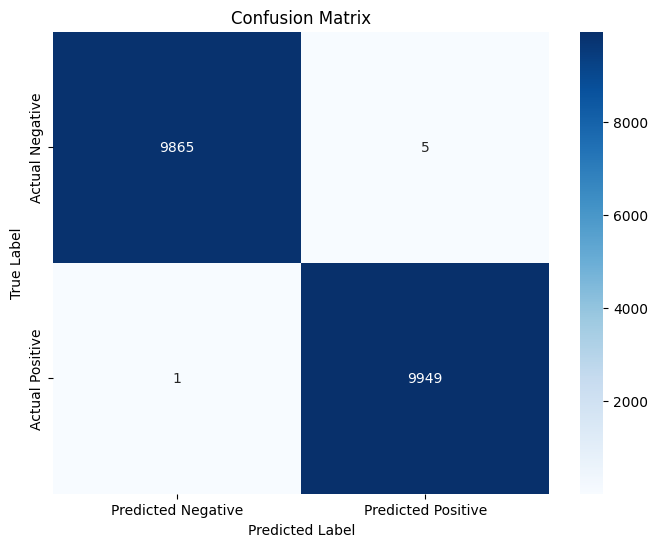

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#Logistic Regression - 5 Epochs

620/620 [==============================] - 1s 1ms/step
Accuracy: 0.9984359233097881
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9870
           1       1.00      1.00      1.00      9950

    accuracy                           1.00     19820
   macro avg       1.00      1.00      1.00     19820
weighted avg       1.00      1.00      1.00     19820



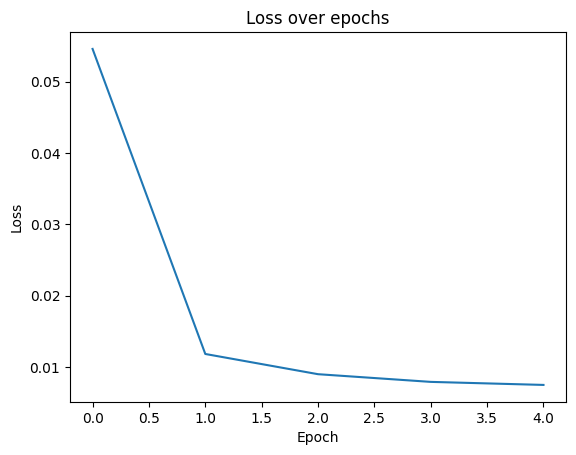

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the logistic regression model
logistic_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

# Compile the model
logistic_model.compile(optimizer='adam',
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

# Initialize lists to store loss history
loss_history = []

# Define a custom callback to track loss history
class LossHistory(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        loss_history.append(logs['loss'])

# Train the model
history = logistic_model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=0, callbacks=[LossHistory()])

# Make predictions on the test set
y_pred_prob = logistic_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the loss history
plt.plot(history.history['loss'])
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


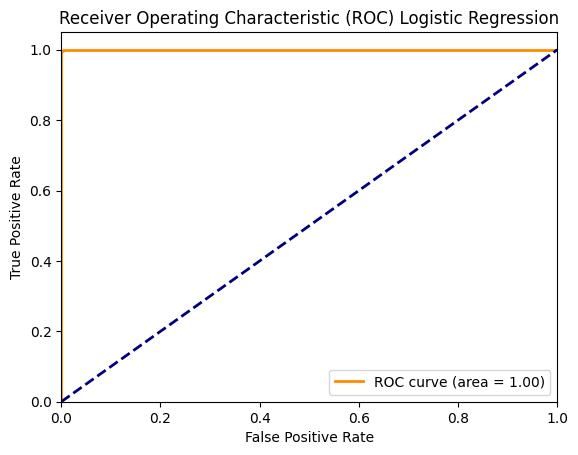

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Logistic Regression')
plt.legend(loc="lower right")
plt.show()

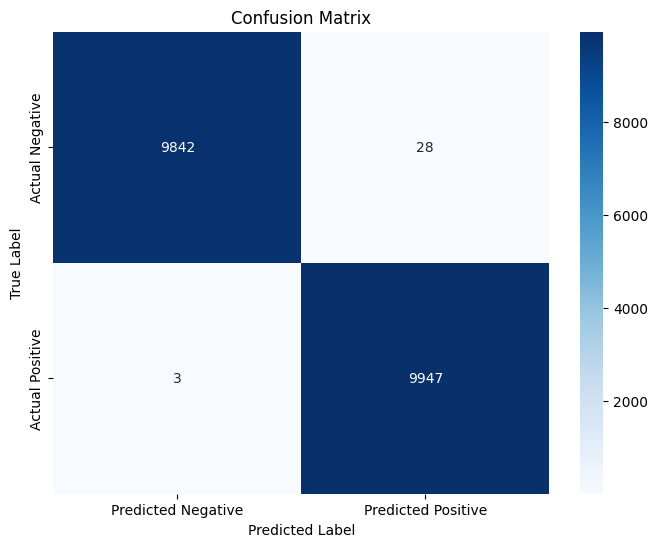

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#Gradient boosting

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert the data into TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test,dtype = tf.float32)

# Define the gradient boosting model parameters
learning_rate = 0.1
n_estimators = 50

# Define TensorFlow decision trees
trees = []

# List to store loss history for plotting
loss_history = []

# Initialize an empty tensor to accumulate predictions
y_preds_sum = tf.zeros_like(y_test_tensor)

for _ in range(n_estimators):
    tree = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    tree.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                 loss='binary_crossentropy')
    trees.append(tree)

# Train the model
for tree in trees:
    history = tree.fit(X_train_tensor, y_train_tensor, epochs=1, batch_size=32, verbose=0)
    loss_history.append(history.history['loss'][0])
    y_preds_sum += tree.predict(X_test_tensor)

# Average the predictions across all trees
y_pred_avg = y_preds_sum / n_estimators
y_pred = tf.round(y_pred_avg).numpy().flatten()




620/620 [==============================] - 1s 1ms/step


In [ ]:
consensus_prediction = np.mean(y_pred_avg, axis=1)

# Round the consensus predictions to get the final binary predictions
y_pred_fin = np.round(consensus_prediction).astype(int)
print(classification_report(y_test, y_pred_fin))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67      9870
           1       0.67      0.58      0.62      9950

    accuracy                           0.64     19820
   macro avg       0.65      0.64      0.64     19820
weighted avg       0.65      0.64      0.64     19820



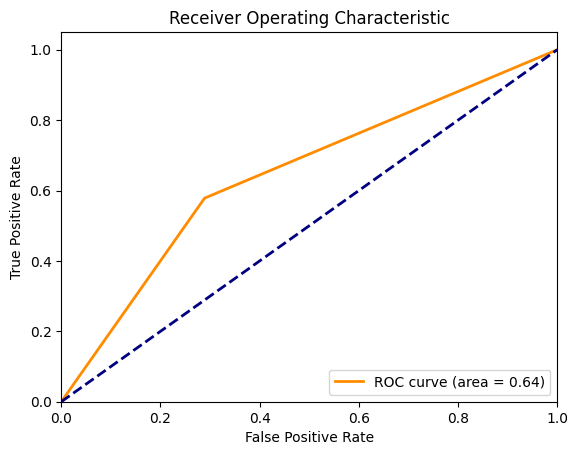

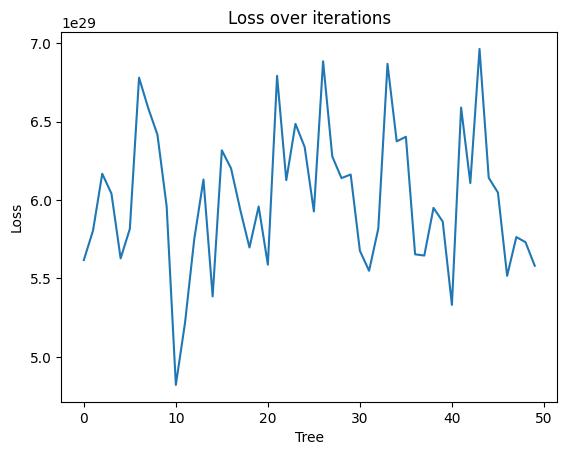

Accuracy: 0.6444500504540868


In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_fin)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the loss history
plt.plot(loss_history)
plt.title('Loss over iterations')
plt.xlabel('Tree')
plt.ylabel('Loss')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_fin)
print("Accuracy:", accuracy)

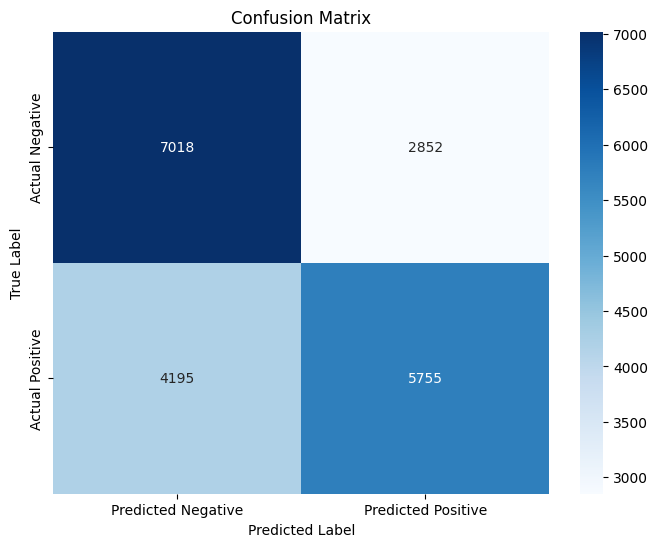

In [ ]:
cm = confusion_matrix(y_test, y_pred_fin)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
"""import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert the data into TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test,dtype = tf.float32)

# Define the gradient boosting model parameters
learning_rate = 0.1
n_estimators = 75

# Define TensorFlow decision trees
trees = []

# List to store loss history for plotting
loss_history = []

# Initialize an empty tensor to accumulate predictions
y_preds_sum = tf.zeros_like(y_test_tensor)

for _ in range(n_estimators):
    tree = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    tree.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                 loss='binary_crossentropy')
    trees.append(tree)

# Train the model
count = 0
for tree in trees:

    history = tree.fit(X_train_tensor, y_train_tensor, epochs=1, batch_size=32, verbose=0)
    count += 1
    print(f'Current Progress: {(count/n_estimators)*100}%')
    loss_history.append(history.history['loss'][0])
    y_preds_sum += tree.predict(X_test_tensor)

# Average the predictions across all trees
y_pred_avg = y_preds_sum / n_estimators
y_pred = tf.round(y_pred_avg).numpy().flatten()

consensus_prediction = np.mean(y_pred_avg, axis=1)

# Round the consensus predictions to get the final binary predictions
y_pred_fin = np.round(consensus_prediction).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_fin)
roc_auc = auc(fpr, tpr)
print(classification_report(y_test, y_pred_fin))
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot the loss history
plt.plot(loss_history)
plt.title('Loss over iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_fin)
print("Accuracy:", accuracy)"""

'import tensorflow as tf\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, roc_curve, auc\nimport matplotlib.pyplot as plt\n\n# Split the data\nX_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\n# Convert the data into TensorFlow tensors\nX_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)\nX_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)\ny_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)\ny_test_tensor = tf.convert_to_tensor(y_test,dtype = tf.float32)\n\n# Define the gradient boosting model parameters\nlearning_rate = 0.1\nn_estimators = 75\n\n# Define TensorFlow decision trees\ntrees = []\n\n# List to store loss history for plotting\nloss_history = []\n\n# Initialize an empty tensor to accumulate predictions\ny_preds_sum = tf.zeros_like(y_test_tensor)\n\nfor _ in range(n_estimators):\n    tree = tf.keras.Sequential([\n        tf.keras.layers.Dense(1, ac

Epoch 1/10
1982/1982 [==============================] - 14s 6ms/step - loss: 0.0158 - accuracy: 0.9973 - val_loss: 0.0143 - val_accuracy: 0.9991
Epoch 2/10
1982/1982 [==============================] - 8s 4ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0243 - val_accuracy: 0.9996
Epoch 3/10
1982/1982 [==============================] - 6s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0243 - val_accuracy: 0.9996
Epoch 4/10
1982/1982 [==============================] - 6s 3ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0249 - val_accuracy: 0.9996
Epoch 5/10
1982/1982 [==============================] - 7s 3ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0245 - val_accuracy: 0.9997
Epoch 6/10
1982/1982 [==============================] - 6s 3ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0121 - val_accuracy: 0.9997
Epoch 7/10
1982/1982 [==============================] - 8s 4ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0210 - val_accuracy

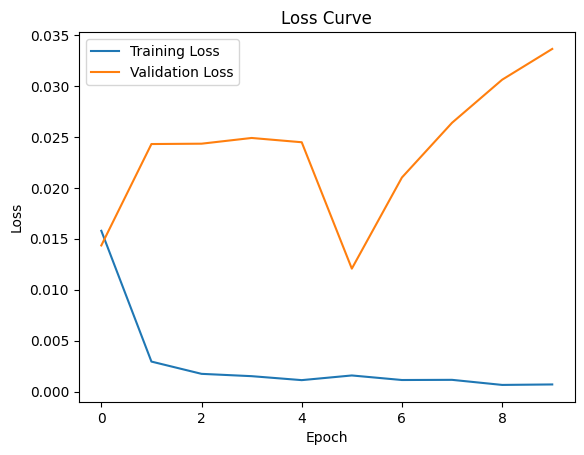

620/620 [==============================] - 1s 1ms/step


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, and y_test are available
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convert the data into TensorFlow tensors

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test,dtype = tf.float32)
# Define the feedforward neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming history is available from model training

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get predictions on the test set
y_pred_prob = model.predict(X_test_scaled)


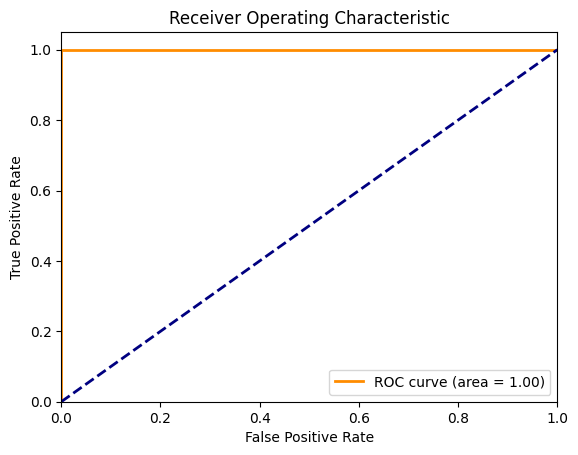

In [ ]:

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#
y_preds = np.where(y_pred_prob >= 0.5, 1, 0)
print(classification_report(y_test, y_preds))
#y_pred_prob

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9870
           1       1.00      1.00      1.00      9950

    accuracy                           1.00     19820
   macro avg       1.00      1.00      1.00     19820
weighted avg       1.00      1.00      1.00     19820



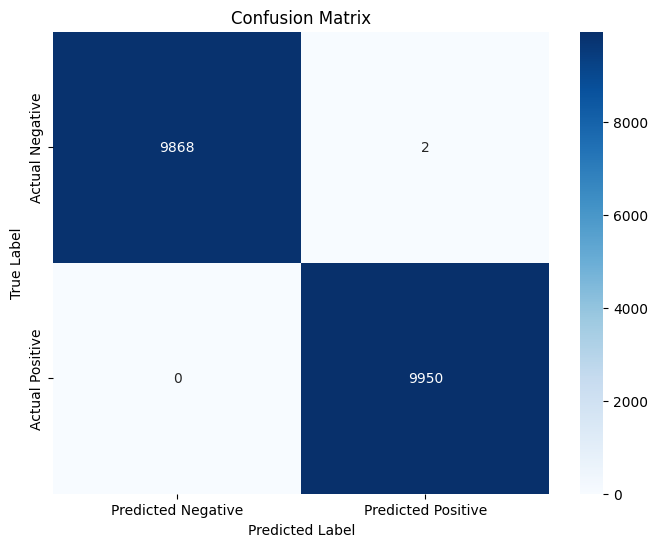

In [ ]:
cm = confusion_matrix(y_test, y_preds)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y = data['Threat']
x = data.copy(deep = True).drop(['Threat','Threat_Binary'],axis = 1)

In [ ]:
class_counts = np.bincount(y)
print(class_counts)

[ 49548  59718  29068  29849  92141 105874 102195 107685 122573 237665
  81982]


In [ ]:
class_dict = {}
for i in range(11):
  class_dict[i] = class_counts[i]

del class_dict[9]
class_dict

{0: 49548,
 1: 59718,
 2: 29068,
 3: 29849,
 4: 92141,
 5: 105874,
 6: 102195,
 7: 107685,
 8: 122573,
 10: 81982}

In [ ]:
# Separate majority and minority classes
majority_class = data[data['Threat'] == 9]
minority_class = data[data['Threat'] != 9]

# Determine the number of samples to keep from the majority class
undersample_size = np.random.choice(list(class_dict.values()))

# Randomly select samples from the majority class
undersampled_majority = majority_class.sample(n=undersample_size, random_state=42)

# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset to mix up the samples
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)
y = undersampled_data['Threat']
x = undersampled_data.copy(deep = True).drop(['Threat','Threat_Binary'],axis = 1)

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(np.unique(y_train))
train_one_hot_labels = tf.one_hot(y_train, depth=11)
test_one_hot_labels = tf.one_hot(y_test, depth=11)
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(11, activation='softmax')  # 11 output neurons for 11 classes, softmax activation for multiclass classification
])

# Compile the model with categorical cross-entropy loss
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
#history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
history = model.fit(X_train, train_one_hot_labels, epochs=10, batch_size=32, validation_split=0.2)


# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, test_one_hot_labels)
print(f'Test Accuracy: {test_accuracy}')


[ 0  1  2  3  4  5  6  7  8  9 10]
Epoch 1/10
17253/17253 [==============================] - 52s 3ms/step - loss: 0.3069 - accuracy: 0.8258 - val_loss: 0.2201 - val_accuracy: 0.8668
Epoch 2/10
17253/17253 [==============================] - 53s 3ms/step - loss: 0.2345 - accuracy: 0.8594 - val_loss: 0.1908 - val_accuracy: 0.8809
Epoch 3/10
17253/17253 [==============================] - 54s 3ms/step - loss: 0.2193 - accuracy: 0.8672 - val_loss: 0.2311 - val_accuracy: 0.8554
Epoch 4/10
17253/17253 [==============================] - 58s 3ms/step - loss: 0.2237 - accuracy: 0.8687 - val_loss: 0.1790 - val_accuracy: 0.8874
Epoch 5/10
17253/17253 [==============================] - 53s 3ms/step - loss: 0.2200 - accuracy: 0.8659 - val_loss: 0.2333 - val_accuracy: 0.8545
Epoch 6/10
17253/17253 [==============================] - 53s 3ms/step - loss: 0.2291 - accuracy: 0.8575 - val_loss: 0.1874 - val_accuracy: 0.8872
Epoch 7/10
17253/17253 [==============================] - 54s 3ms/step - loss: 0.21

In [ ]:
y_test

96394    1
34637    0
77218    1
10366    1
34444    0
        ..
11757    0
90858    0
49071    1
98141    0
63442    1
Name: Threat_Binary, Length: 19820, dtype: int64

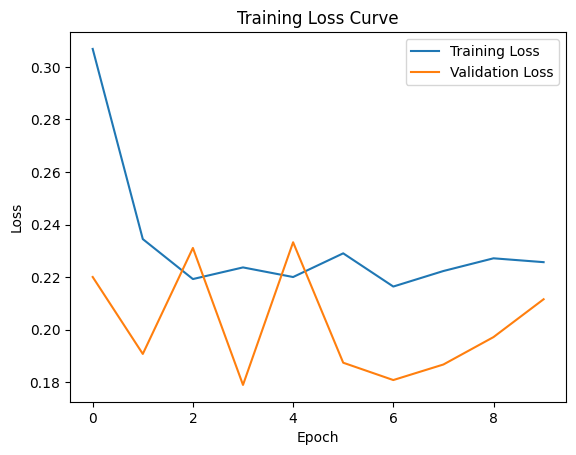

5392/5392 [==============================] - 8s 1ms/step


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Assuming model and X_test, y_test are available

# Plot the training loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_prob, axis=1)




array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 3.9721881e-17,
        4.0342750e-34, 0.0000000e+00],
       [1.2841416e-06, 3.8675669e-08, 1.4455634e-07, ..., 8.7273994e-10,
        1.6128369e-10, 1.2842875e-13],
       [3.7365966e-10, 1.8149576e-07, 4.7756384e-07, ..., 4.3445680e-10,
        1.3495402e-01, 5.2918008e-08],
       ...,
       [3.7365966e-10, 1.8149576e-07, 4.7756384e-07, ..., 4.3445680e-10,
        1.3495402e-01, 5.2918008e-08],
       [0.0000000e+00, 0.0000000e+00, 3.1750059e-34, ..., 5.3793448e-17,
        2.4225199e-36, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

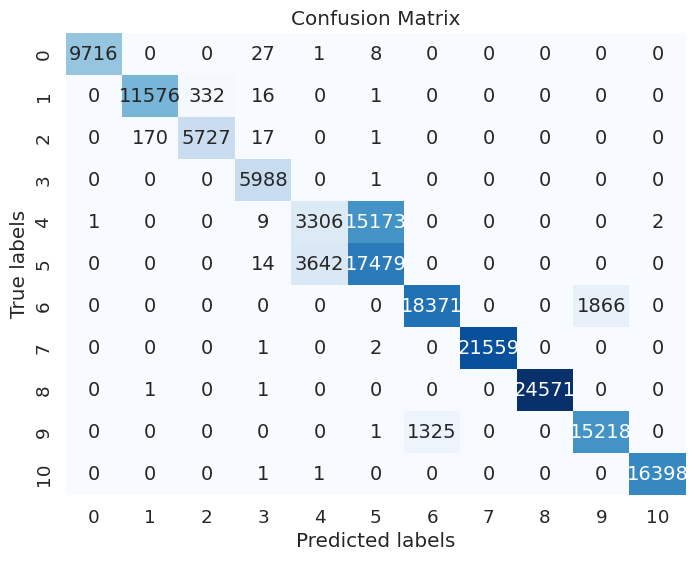

In [ ]:
# get the matrix of right guesses for threat families
import seaborn as sns
from sklearn.metrics import confusion_matrix
#y_labs = [np.argmax(arr) for arr in y_pred_labels]
cm = confusion_matrix(y_test,y_pred_labels)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9752
           1       0.99      0.97      0.98     11925
           2       0.95      0.97      0.96      5915
           3       0.99      1.00      0.99      5989
           4       0.48      0.18      0.26     18491
           5       0.54      0.83      0.65     21135
           6       0.93      0.91      0.92     20237
           7       1.00      1.00      1.00     21562
           8       1.00      1.00      1.00     24573
           9       0.89      0.92      0.91     16544
          10       1.00      1.00      1.00     16400

    accuracy                           0.87    172523
   macro avg       0.89      0.89      0.88    172523
weighted avg       0.87      0.87      0.86    172523

